In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [24]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [26]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [27]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<AxesSubplot:xlabel='Sales', ylabel='Density'>

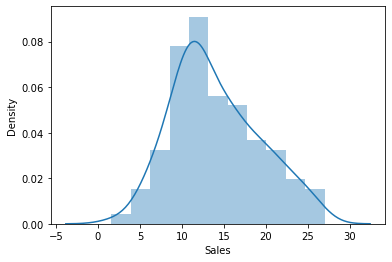

In [31]:
import seaborn as sns
sns.distplot(df.Sales)

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

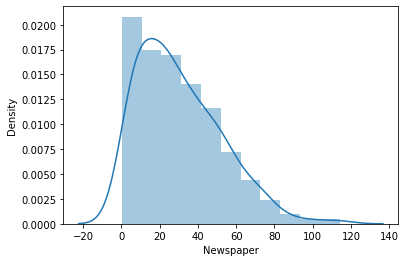

In [33]:
sns.distplot(df.Newspaper)

<AxesSubplot:xlabel='Radio', ylabel='Density'>

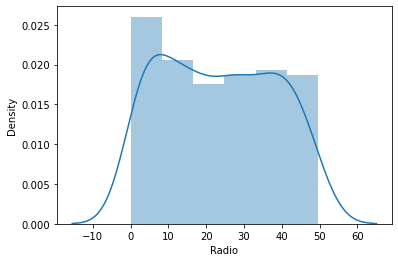

In [34]:
sns.distplot(df.Radio)

<AxesSubplot:xlabel='TV', ylabel='Density'>

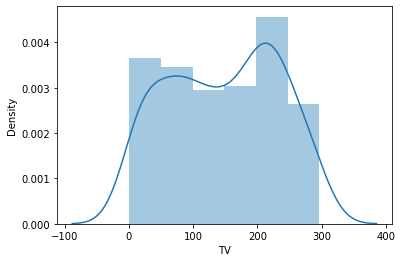

In [35]:
sns.distplot(df.TV)

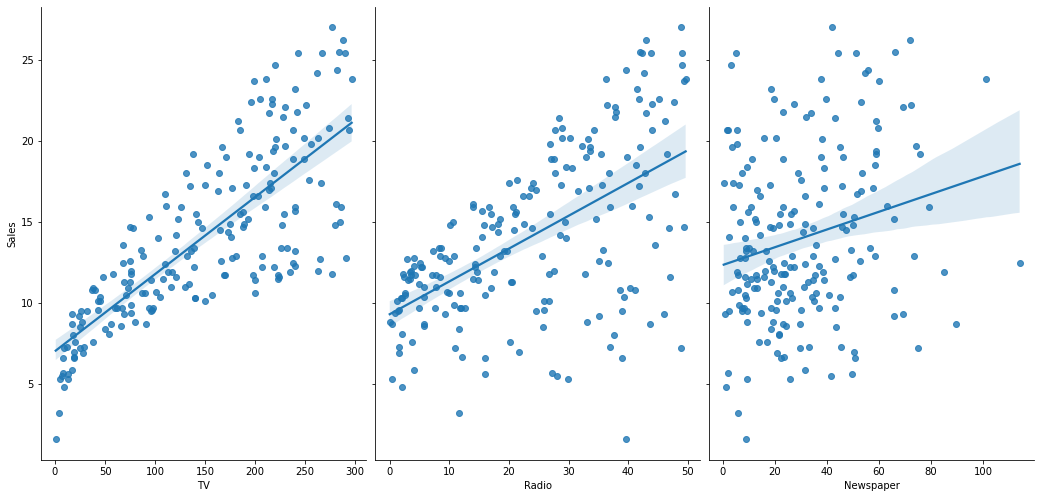

In [38]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales',
             height = 7, aspect = 0.7, kind='reg')

In [39]:
df.TV.corr(df.Sales)

0.7822244248616061

In [40]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

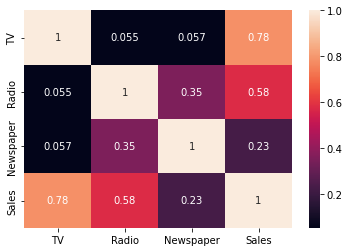

In [41]:
sns.heatmap(df.corr(), annot=True)

In [42]:
X = df[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [43]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [44]:
y = df.Sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150,)
(50,)


In [50]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [51]:
print(lm.intercept_)
print(lm.coef_)

6.91197261886872
[0.04802945]


In [52]:
y_pred = lm.predict(X_test)

In [53]:
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.210929707703542
